<a href="https://colab.research.google.com/github/br3nburk/adleobb/blob/main/graded_assignment2_bb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Work through the assignment 2 notebook, and use this notebook to provide your answers. 

To submit the assignment, you will need to use GitHub and the existing private repository you already created called `adleoxyz` (xyz is your initials)

Once you have completed the assignment:
- Commit your notebook from colab to your private GitHub repo
- The notebook should be named assignment2_xyz.ipynb, with xyz again replaced by your initials.

# Answers to the theoretical questions

Please provide your answers to questions 1-4 here

**Answer to Q1**

An MLP trained on images with dogs only on the left side of the image frame probably will likely not recognize a test image with a dog on the right side of the frame. MLPs are unable to learn spatial features of an image and have fixed input size, making it difficult for them to recognize dogs' new positions within the frame.

A CNN is designed to learn spatial features of an image, allowing it to recognize objects in different positions within the image. CNNs use convolutional layers that scan the input image and extract local features, allowing them to learn patterns regardless of their location within the image. Therefore, a CNN trained on images with dogs only on the left side of the image frame could probably recognize a test image with a dog on the right side of the frame. That being said, in order to ensure recognition in different areas of the image frame, a CNN should be trained on a diverse set of images with dogs in different positions.


**<font color='red'> 5/5 points on Q1</font>**

**Answer to Q2**

As we saw in the first question from Assignment 1, when the number of input bands or the units in the hidden layers increase the number of parameters increases dramatically, since the weight matrix would have size (W × H × C) × D, where D is the number of outputs (hidden units).

Suppose we want to train a network that takes a W × H × C image as input:

a) What is the number of trainable parameters if we pass this image chip through a torch.nn.Conv2d() layer with the kernel_size= f×f and number of out_channels=D, considering the stride=1 and padding=0?
**280: see calculations below**

Activation size: W x H x C = 5 x 5 x 3 = 75

Bias: +1 for single conv layer

Trainable parameters for conv layer:
((f x f x C)+ 1) x D 
or:

param_number = output_channel_number x (input_channel_number x kernel_height x kernel_width + 1) or:

CONV(filter shape =3x3, stride=1) layer is: ((shape of width of filter x shape of height filter x number of filters in the previous layer+1) x number of filters) = (((3 x 3 x 3)+1) x 10) = 280

In answering the question, use 5, 5, 3, 10 for W, H, C, and D, respectively, and 3 for f.


b) What is the shape of the weight and bias for our conv2d layer?
Weight dimension is same as kernel 3x3, and bias for a CNN layer is a single scalar value, thus 3x3x1

c) What would be the computational cost of our conv2d layer?
Computations = # filters in conv2d layer x size of kernel x image size x stride = 10 x (3x3) x (5x5x3) x 1 = 6750


Hint: Computational cost refers to the total number of operations, which is different from the number of trainable parameters.

**<font color='red'> 8.5/10 points on Q2</font>**

<p><font color='blue'>
a)
</br>
[(fxfxC)+1]xD inside the paranthesis is the number of trainable parameters for a single filter. Number 1 is refering to the bias term. And D is number of filters we want aka. number of output features.
</br>
b)
</br>
weight shape: (D, C, f, f)
</br>
bias shape: (D, )
</br>
c)
</br>
The total number of FLOPs required for the convolution and the bias addition can be computed as follows:
</br>
</br>
FLOPs = [(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out] x (H_in - f + 1) x (W_in - f + 1) x Batch_size
</br>
</br>
Let's go through the formula step by step. Assuming the input to the layer has dimensions "[Batch_size, H_in, W_in, C_in]", the kernel has dimensions "[C_out,f, f, C_in]", and the output has dimensions "[Batch_size, (H_in - f + 1), (W_in - f + 1), C_out]".
</br>
</br>
f x f x C_in: is the number of trainable weights in a filter.
</br>
</br>
(f x f x (C_in - 1)): To see why, let's break down the dot product operation required for each output channel in a 2D convolution layer. We need to multiply each element of the kernel with the corresponding element in the input volume, and then sum these products together to obtain a scalar output value. However, We only need to perform "C_in - 1" additions when summing "C_in" matrices because we can sum them pairwise using "C_in/2" additions, then sum the resulting sums pairwise again, and so on, until we have a single sum. For example, suppose we want to compute the sum of 4 matrices, A, B, C, and D. We can first compute the pairwise sums "A + B" and "C + D", which requires 2 additions. We can then compute the pairwise sum of these two intermediate sums, "(A + B) + (C + D)", which requires 1 addition. Finally, we have the sum of all 4 matrices, which required a total of 3 additions. More generally, the sum of n matrices can be computed using n-1 additions.
</br>
</br>
(f x f x C_in + (f x f x (C_in - 1))): this statement now accounts for the total number of multiplications and summations for trainable weights of a single filter in a conv layer.
</br>
</br>
(f x f x C_in + (f x f x (C_in - 1))) x C_out: we now consider the number of output features, aka. number of filters we want.
</br>
</br>
[(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out]: by adding the operations for the bias we completed the total number of arithmetic operations involved for the trainable parameters of all the filters.
</br>
</br>
Now how many times we need to repeat this operation? All we calculated so far is required to make a single position in our output. So we need to repeat the operation as the size of the output. We already considered the number of output channels so we only need to pay attention to W and H of the output. 

In a valid conv without padding and unit stride the output will be:
 `(H or W) - f + 1`, hence: `[(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out] x (H_in - f + 1) x (W_in - f + 1)`
</br>
</br>
If we are considering the batch size in our calculation then:
`[(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out] x (H_in - f + 1) x (W_in - f + 1) x Batch_size` </font> </p>

**Answer to Q3**

How much have we saved in terms of both computation cost and the number of trainable parameters?

Input: 64x64x100
Kernel: 5x5
Output: 192

No Dimensionality reduction (assuming bias term = 1):

Trainable Parameters: 192 x (100x5x5 + 1) = 480,192

Computations: 192 x (5x5) x (64x64x100) x 1 = 1,966,080,000

---------------------------------------------------------

1x1x10 Dimensionality reduction (assuming bias term = 1):

Reduces 100 channels to 10, so replace 100 with 10

Trainable Parameters 1x1: 10 x (100x1x1 + 1) = 1010

Trainable Parameters 5x5: 192 x (10x5x5 + 1) = 48,192

Total 1x1 + 5x5 conv Parameters: 49202

Computations 1x1: 10 x (1x1) x (64x64x100) = 4,096,000

Computations 5x5: 192 x (5x5) x (64x64x10) x 1 = 196,608,000

Total 1x1 + 5x5 computations: 200,704,000

----------------------------------------------------------
Now let's calculate the ratios:

**Parameter ratio: (480,192 / 49202) = 9.76**

**Computations ratio: (1,966,080,000 / 200,704,000) = 9.80**

So for a simple estimate (basically disregarding bias) of how much we save with 1x1 dimensionality reduction , assuming stride = 1 and no padding for all layers involved, we have:

**Input layer channels / reduction layer features = 100/10 = 10**





**<font color='red'> 5/5 points on Q3</font>**

<font color='blue'>You did not use the parentheses correctly. It should be: `Computations: 192 x (5x5x100) x (64x64) = 1,966,080,000`. Also, always use the spatial dimension of the output. It might be valid then you end up with 62 by 62 output.</font>

**Answer to Q4**

VGG:
VGG, published by "Visual Geometry Group" scientists Karen Simonyan and Andrew Zisserman in 2014, introduced deep convolutional neural network with a very uniform architecture composed of stacks of 3x3 convolutional layers with a 2x2 max pooling layer in between. Because the 3x3 convolution layers are small, depth can be increased (originally 16-19), and thus they were able to improve model performance without sacrificing computational cost.

GoogLeNet (introduced as Inception):
GoogLeNet, also from 2014, introduced the use of Inception modules, which are composed of a series of 1x1 and 3x3 convolutional layers that are used to reduce the number of parameters while still extracting useful features. The naive network passes layers through a set of 1x1, 3x3, and 5x5 convolutions before concatenation to the next layer, but they reduce dimensionality and computational cost by adding 1x1 convolutions before the 3x3 conv, 5x5 conv, and 3x3 maxpooling layer. This makes the model excellent at classification and detection without intensive computing resources.

ResNet:
ResNet, published in 2015 by He et al, introduced the use of residual blocks which are composed of 3x3 convolutional layers, batch normalization, and skip connections. The residual learning allows the network to learn more complex functions and reduce the vanishing gradient problem. It also allows unprecedented depth, in the paper up to 152 layers, compared to VGG and other architectures while still maintaining lower complexity.

(5 points)

**<font color='red'> 5/5 points on Q4</font>**

<p><font color='blue'> VGG Family: Simple structure with all conv layers have a small kernel size of size 3. The idea is stacking many such conv layers with small kernels can increase the RF linearly as 2 consequtive 3x3conv layers will have the same RF as a 5x5 conv layer. further including multiple gradual pooling in between conv layers will increase the RF multiplicatively. Poolings reduces the number of parameters and VGG leverage that by doubling the width of the network after each downsampling to keep a high capacity network.

GoogLeNet Family: They introduced the idea of parallel processing by using branches of conv layers with different kernel sizes into the blocks that buildup the model. Another novelty of this model was showing that careful design of specific building blocks can make models with high predictive powers but the design trend currently favors deep models that are repititions of simple blocks.

ResNet Family: With ResNet for the first time training of models with hundreds of layers became possible. Resnet uses branching in its block with specifically two branches. An identity branch that passes the input unchanged or in some variations passes a linear transformation of the input. The residual branch consist of two 3x3 conv+BN+ReLU layers. Output will be summation of the two branches. The idea is the signal can pass unchanged or if needed get modified by the residual branch. During the backward pass the derivative has two options to go through which is hugely effective in battling the vanishing gradient problem.</font></p> 

# Coding Assignment 1

Follow the instructions below to complete your coding assignment. 

Run the code below unchanged, unless otherwise indicated. 

## Static code 1

Run unchanged

Mount drive and run imports

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

from IPython.core.debugger import set_trace

## Variables to set

- Model save path: Modify 'save_dir' to the path to your already downloaded MNIST dataset (from assignment 1).

In [ ]:
save_dir = "/content/gdrive/MyDrive/BB_ADLEO/A1"

## Static code 2

### Transforms and loads (Steps 1.1-1.5)

Necessary transforms - run unchanged


In [ ]:
mnist_mean = 0.13066048920154572
mnist_std = 0.30810779333114624

train_transforms = transforms.Compose(
    [transforms.RandomRotation(5, fill=(0,)),
     transforms.RandomCrop(28, padding=2),
     transforms.ToTensor(),
     transforms.Normalize(mean=[mnist_mean], std=[mnist_std])]
     )

test_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[mnist_mean], std=[mnist_std])]
     )

Load and split

In [ ]:
train_data = datasets.MNIST(root=save_dir,
                            train=True,
                            download=False,
                            transform=train_transforms)

test_data = datasets.MNIST(root=save_dir,
                           train=False,
                           download=False,
                           transform=test_transforms)

train_ratio = 0.9

n_train_examples = int(len(train_data) * train_ratio)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,[n_train_examples, 
                                                       n_valid_examples])

valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

Make iterable

In [ ]:
# define batch size first
train_bsize = 54   # training batch size--can change for optional part

In [ ]:
# Don't change this cell
train_loader = data.DataLoader(train_data,
                               shuffle=True,
                               batch_size=train_bsize)

valid_loader = data.DataLoader(valid_data,
                               shuffle=False,
                               batch_size=train_bsize)

test_loader = data.DataLoader(test_data,
                              shuffle=False,
                              batch_size=train_bsize)

### Metrics and some other necessary functions

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = Variable(x).to(device)
        y = Variable(y).to(device)

        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        acc = calculate_accuracy(y_pred, y)

        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    # Disable automatic differentiation as we don't do optimization on eval.
    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = Variable(x).to(device)
            y = Variable(y).to(device)

            y_pred = model(x)
            
            loss = criterion(y_pred, y)
            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def plot_confusion_matrix(labels, pred_labels):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


## Task 1: Adjust the model

Modify your MLP as required

**<font color='red'> 15/15 points on task 1 & 2 in coding assignment 1</font>**

In [ ]:
class myLeNet(nn.Module):
    def __init__(self, in_dim, num_classes):
        super(myLeNet, self).__init__()
    # Create first convolutional layer
        self.layer1 = nn.Sequential(
       
        # 1 channel input, 6 channel output, kernel = 5
        nn.Conv2d(in_dim, 6, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    # 2nd convolutional layer
        self.layer2 = nn.Sequential(
        # 6 channel input, 16 channel output, kernel = 5
        nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    # Create fully-connected layer after flattening 2nd convolution
        self.fc = nn.Linear(400, 120)
    # Create ReLU activation
        self.relu = nn.ReLU()
    # Create second fully-connected layer
        self.fc1 = nn.Linear(120, 84)
    # Create second ReLU activation
        self.relu1 = nn.ReLU()
    # Create third fully-connected layer
        self.fc2 = nn.Linear(84, num_classes)

# Define forward propagation
    def forward(self, x):
        # Pass input through first convolutional layer
        out = self.layer1(x)
        # Pass output of first layer through second convolutional layer
        out = self.layer2(out)
        # Reshape / flatten output of second layer
        out = out.reshape(out.size(0), -1)
        # Pass output through fully-connected layer
        out = self.fc(out)
        # Pass output through ReLU activation
        out = self.relu(out)
        # Pass output through second fully-connected layer
        out = self.fc1(out)
        # Pass output through second ReLU activation
        out = self.relu1(out)
        # Pass output through third fully-connected layer
        out = self.fc2(out)
        # Return output
        return out


# Assignment 1 template
# class myLeNet(nn.Module):
#     def __init__(self, in_dim, hidden_1, hidden_2, out_dim, drop_rate):
#         super(myLeNet, self).__init__()        

#         layers=[]
#         layers.append(nn.Linear(in_dim, hidden_1, bias=True)) # input_FC
#         layers.append(nn.BatchNorm1d(hidden_1,))
#         layers.append(nn.LeakyReLU()) # LeakyReLU_1
#         layers.append(nn.Dropout(drop_rate, inplace=False)) # drop out
        
#         layers.append(nn.Linear(hidden_1, hidden_2, bias=False)) # Hidden_FC
#         layers.append(nn.LeakyReLU()) # LeakyReLU_2
#         layers.append(nn.Linear(hidden_2, out_dim, bias=True)) # Output_FC

#         self.cnn_block = nn.Sequential(*layers)

#     def forward(self, x): #defines how forward propagation runs for training and inference


#         batch_size = x.shape[0]
#         x = x.view(batch_size, -1)

#         y_pred = self.cnn_block(x)

#         return y_pred

If you are struggling to get it working, here is a commented out version of the example model that you can run and adapt.  You might want to use some of the other 3 examples that we suggested for structuring the model class

Define the parameters needed to run the model

In [ ]:
in_dim = 1

initial_lr = input("Enter SGD initial learning rate (0.001 is good start):")
initial_lr = float(initial_lr) # Hyper-parameter that you can change for optional part

num_epochs = input("Enter epochs (10 is good start):") # same as above
num_epochs = int(num_epochs)

train_bsize = input("Enter training batch size (54 is good start):") 
train_bsize = int(train_bsize)

# new variable
num_classes = 10

Enter SGD initial learning rate (0.001 is good start):0.001
Enter epochs (10 is good start):10
Enter training batch size (54 is good start):54


## Task 2: Show your work

Run and print the model

In [ ]:
# Don't change this cell
model = myLeNet(in_dim, num_classes = num_classes)
print(model)

myLeNet(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=400, out_features=120, bias=True)
  (relu): ReLU()
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


Show the number of parameters in the model

In [ ]:
# Don't change this cell
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 61,750 trainable parameters


Optimizer, loss criterion, and GPU/CPU switch

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

Train the model

In [ ]:
best_val_loss = float('inf')
train_loss_per_epoch = []
val_loss_per_epoch = []
epoch_counter = []

for epoch in trange(num_epochs):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)

    #simple implementation of early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_mlp_tutorial.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')

    epoch_counter.append(epoch)
    train_loss_per_epoch.append(train_loss)
    val_loss_per_epoch.append(val_loss)

  0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 55s
	Train Loss: 0.276 | Train Acc: 91.52%
	 Val. Loss: 0.069 |  Val. Acc: 97.87%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 52s
	Train Loss: 0.094 | Train Acc: 96.96%
	 Val. Loss: 0.053 |  Val. Acc: 98.33%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 55s
	Train Loss: 0.075 | Train Acc: 97.64%
	 Val. Loss: 0.057 |  Val. Acc: 98.21%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 54s
	Train Loss: 0.063 | Train Acc: 98.00%
	 Val. Loss: 0.039 |  Val. Acc: 98.66%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 54s
	Train Loss: 0.055 | Train Acc: 98.23%
	 Val. Loss: 0.029 |  Val. Acc: 98.97%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 53s
	Train Loss: 0.052 | Train Acc: 98.38%
	 Val. Loss: 0.041 |  Val. Acc: 98.78%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 53s
	Train Loss: 0.047 | Train Acc: 98.50%
	 Val. Loss: 0.032 |  Val. Acc: 98.88%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 56s
	Train Loss: 0.046 | Train Acc: 98.58%
	 Val. Loss: 0.030 |  Val. Acc: 99.14%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 52s
	Train Loss: 0.040 | Train Acc: 98.66%
	 Val. Loss: 0.039 |  Val. Acc: 98.89%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 53s
	Train Loss: 0.040 | Train Acc: 98.73%
	 Val. Loss: 0.035 |  Val. Acc: 98.93%


Plot the results

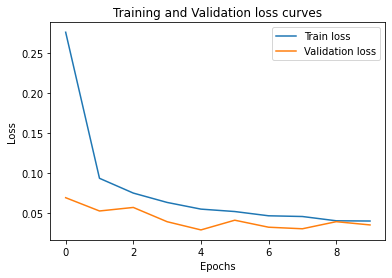

In [ ]:
plt.plot(epoch_counter, train_loss_per_epoch, label="Train loss")
plt.plot(epoch_counter, val_loss_per_epoch, label="Validation loss")
plt.title("Training and Validation loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Evaluate the performance

In [ ]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/186 [00:00<?, ?it/s]

Test Loss: 0.027 | Test Acc: 99.10%


Show the matrix

## Coding Assignment 2
Download a picture from internet that is among the 1000 classes of the ImageNet dataset labels. Choose five different pre-trained models in torchvision and report the top-1 accuracy related to each model.

Organize your answer like this: Link to the image you have chosen if its available on the web. If the image is in your local machine, you can either upload it in your github repo with the name infer_img_assgn2. Or copy the image to your gdrive and give it permission for everyone with the link (rclick the image --> share with google Drive).

Use the template below to complete this coding assignment.

### Static code 3

This combines the packages and model loads with Step 2, for simplicity

#### Load pre-trained models

Load up models and inspect names. Note that we use here a slightly more compact approach to printing the model names

In [ ]:
import requests # imports the requests module
import torchvision # imports the torchvision module
import torch.utils.model_zoo as model_zoo # imports the torch.utils.model_zoo 
                                          # module and creates a model_zoo alias
import torchvision.models as models # imports the torchvision.models 
                                    # module and creates a models alias
from PIL import Image # imports the Image module from the Pillow package 

import requests

import io

import urllib

# model names
model_names = sorted(name for name in models.__dict__ \
                     if name.islower() and not name.startswith("__"))
# creates a variable called model_names and stores a list of lowercase
# model names from the models module in it

# print(model_names)
mod_index = np.linspace(start=0, stop=len(model_names), num=20) \
              .astype('int').tolist()
# creates a variable called mod_index and stores an array of 20 evenly spaced 
# integers from 0 to the length of model_names in it

for i in range(len(mod_index[:-1])):
    print(model_names[mod_index[i]:mod_index[i+1]])
# prints the model_names list in chunks of 20 items using the mod_index array


['_api', '_meta', '_utils', 'alexnet', 'convnext']
['convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet', 'densenet121']
['densenet161', 'densenet169', 'densenet201', 'detection', 'efficientnet', 'efficientnet_b0']
['efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5']
['efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'get_model']
['get_model_builder', 'get_model_weights', 'get_weight', 'googlenet', 'inception', 'inception_v3']
['list_models', 'maxvit', 'maxvit_t', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75']
['mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3_large']
['mobilenet_v3_small', 'mobilenetv2', 'mobilenetv3', 'optical_flow', 'quantization', 'regnet']
['regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf']
['regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 

#### Step 2: transform function 

Needed to make your selected image fit with the model


In [ ]:
transform = transforms.Compose([            
  transforms.Resize(256),                    
  transforms.CenterCrop(224),                
  transforms.ToTensor(),                     
  transforms.Normalize(                      
    mean=[0.485, 0.456, 0.406],                
    std=[0.229, 0.224, 0.225]                  
  )]) #prepping images to consistent size and normalize before input into model


### Dynamic code - change once

#### Step 3: Load up your image

Remember to replace either the URL with one points to the image you want to classify, if it is different (and different is more interesting!), or if you are downloading your image, comment out the load from url `Image.open` line and uncomment the load from file version, with your correct file path in it.

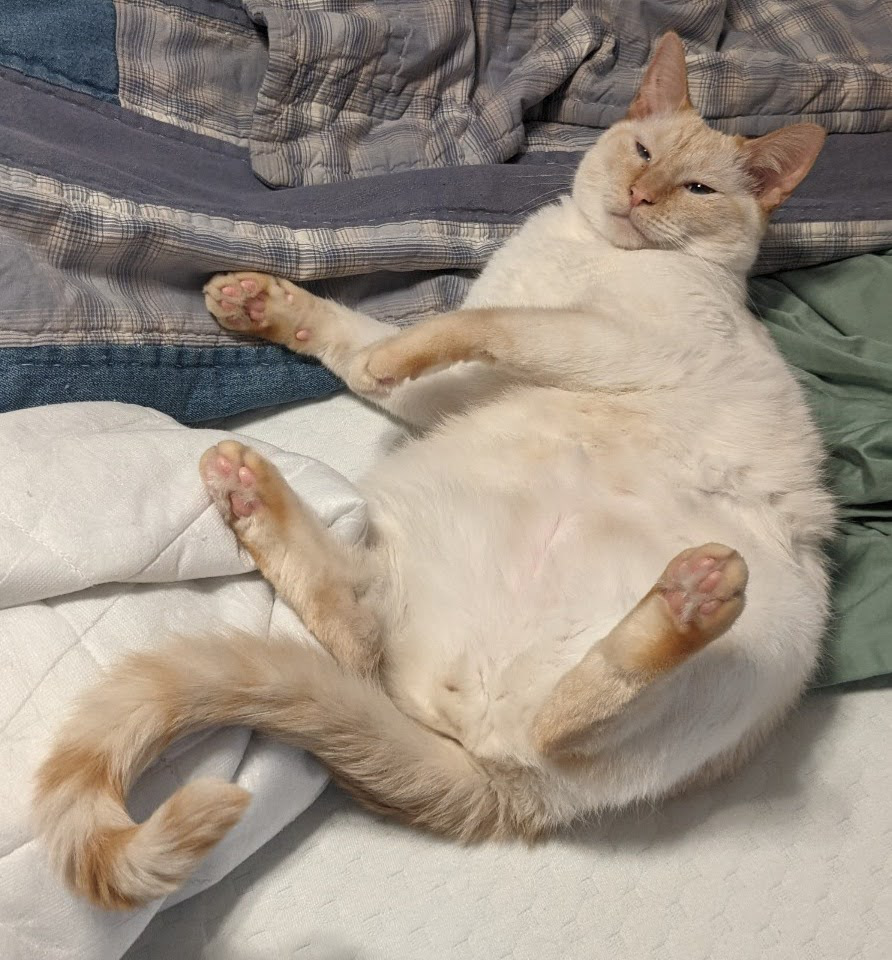

In [ ]:
# url = ("https://raw.githubusercontent.com/br3nburk/adleobb/main/infer_img_assgn2.jpg?token=GHSAT0AAAAAAB54NV33KBZFFRVK2OXFQL32Y7WPINQ") # image Url of chosen
# img = Image.open(requests.get(url, stream=True).raw)
# uncomment this one to load in downloaded image, adjust path as needed
img = Image.open("/content/gdrive/MyDrive/BB_ADLEO/A2/infer_img1_assgn2.jpg")
# Can change path to test different pictures- I used img1 for the 5 models

# img1 = Toasty, a red point siamese on his back
# img2 = Toasty, a red point siamese stretched on his side

img = img.convert("RGB")
img_trans = transform(img)
batch_t = torch.unsqueeze(img_trans, 0)
img  ## this lets us see your image

#### Step 4: Load up class definitions
Use either the downloaded version, or, for the extra 1 point, show the method you used to pull it directly from its url. 

**<font color='red'> 1/1 bonus point</font>**

Downloaded version

In [ ]:
#regular method
# imagenet_class_path = "/content/gdrive/MyDrive/BB_ADLEO/A2/imagenet_classes.txt"
# with open(imagenet_class_path) as f:
#     labels = [line.strip() for line in f.readlines()]
#     print(labels)

# Bonus method
import requests # already did just making sure
url = 'https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/imagenet_classes.txt'
img_classes = requests.get(url)
labels = [line.strip() for line in img_classes.text.splitlines()]
print(labels)


['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed frog, bell toad, 

### Assignment code (5X)

Run each of your 5 model versions here. You will repeat the parts of Step 4 needed to run the models, as demonstrated in the next cells

**<font color='red'> 10/10 points on coding assignment 2</font>**

#### Demo

In [ ]:
# create model objects and look at its internals
alexnet = models.alexnet(pretrained=True)  # model
print(alexnet)

Check out the pooling layer and classifier. Note the name of the pooling layers will be different in different models. Please change accordingly. 

In [ ]:
print(alexnet.avgpool)
print("%" * 20)
print(alexnet.classifier)

Report the accuracy metrics

In [ ]:
alexnet.eval()
out_vec = alexnet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

#### Model 1

In [ ]:
# NOTE: There are very good models I didn't use in this section because
# the model objects did not have pooling and classifer attributes I
# could easily check with print(). If the arbitrary check of pooling and
# classifier was not required I would try googlenet, resnet, and inception v3. In
# any case I figured this out after digging into the structure of all of these
# models at https://github.com/pytorch/vision/tree/main/torchvision/models
# AlexNet:
# create model objects and look at its internals
alexnet = models.alexnet(pretrained=True)  # model
print(alexnet)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# pooling and classifier
print(alexnet.avgpool)
print("%" * 20)
print(alexnet.classifier)

AdaptiveAvgPool2d(output_size=(6, 6))
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [ ]:
# Evaluation: AlexNet's best guess for Toasty image 1 is a kuvasz dog, 26.4 confidence
alexnet.eval()
out_vec = alexnet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('kuvasz', 26.40477180480957),
 ('Ibizan hound, Ibizan Podenco', 8.960189819335938),
 ('Egyptian cat', 4.738631248474121),
 ('English setter', 4.573807716369629),
 ('Great Pyrenees', 3.3123109340667725)]

#### Model 2

In [ ]:
# VGG16:
# create model objects and look at its internals
from torchvision.models import vgg16

vgg16 = models.vgg16(pretrained=True)  # model
print(vgg16)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# pooling and classifier
print(vgg16.avgpool)
print("%" * 20)
print(vgg16.classifier)

# Evaluation: VGG16's best guess for Toasty image 1 is a Siamese cat, 21.0 confidence
vgg16.eval()
out_vec = vgg16(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


AdaptiveAvgPool2d(output_size=(7, 7))
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('Siamese cat, Siamese', 21.068273544311523),
 ('lynx, catamount', 7.650180339813232),
 ('tiger cat', 5.294225215911865),
 ('Egyptian cat', 5.223742961883545),
 ('Persian cat', 3.7290151119232178)]

Model 3

In [ ]:
# ConvNeXt Tiny: Model 4 will be ConvNeXt Large to see how differently they perform
# create model objects and look at its internals
from torchvision.models import convnext_tiny

convnext_tiny = models.convnext_tiny(pretrained=True)  # model
print(convnext_tiny)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth


  0%|          | 0.00/109M [00:00<?, ?B/s]

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [ ]:
# pooling and classifier
print(convnext_tiny.avgpool)
print("%" * 20)
print(convnext_tiny.classifier)

# Evaluation: ConvNeXt Tiny's best guess for Toasty image 1 is a Siamese cat, 13.6 confidence
convnext_tiny.eval()
out_vec = convnext_tiny(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

AdaptiveAvgPool2d(output_size=1)
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): LayerNorm2d((768,), eps=1e-06, elementwise_affine=True)
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=768, out_features=1000, bias=True)
)
torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('Siamese cat, Siamese', 13.635945320129395),
 ('Cardigan, Cardigan Welsh corgi', 7.879599094390869),
 ('Egyptian cat', 7.523542404174805),
 ('Pembroke, Pembroke Welsh corgi', 4.558005332946777),
 ('quilt, comforter, comfort, puff', 2.7609786987304688)]

#### Model 4

In [ ]:
# ConvNeXt Large: Noticeably slower to run
# create model objects and look at its internals
from torchvision.models import convnext_large

convnext_large = models.convnext_large(pretrained=True)  # model
print(convnext_large)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Large_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_large-ea097f82.pth" to /root/.cache/torch/hub/checkpoints/convnext_large-ea097f82.pth


  0%|          | 0.00/755M [00:00<?, ?B/s]

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (1): Permute()
          (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=192, out_features=768, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=768, out_features=192, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (1): Permute()
          (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

In [ ]:
# pooling and classifier
print(convnext_large.avgpool)
print("%" * 20)
print(convnext_large.classifier)

# Evaluation: ConvNeXt Large's best guess for Toasty image 1 is a quilt, which 
# is interesting because the quilt he's on takes up about the same area as him.
# ConvNeXt is much more confident about this image being a quilt- 45.8. Probably
# good for image segmentation in this case, it could classify both the quilt and
# cat.
convnext_large.eval()
out_vec = convnext_large(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

AdaptiveAvgPool2d(output_size=1)
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): LayerNorm2d((1536,), eps=1e-06, elementwise_affine=True)
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=1536, out_features=1000, bias=True)
)
torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('quilt, comforter, comfort, puff', 45.76194763183594),
 ('Cardigan, Cardigan Welsh corgi', 8.607054710388184),
 ('sleeping bag', 7.175699710845947),
 ('Pembroke, Pembroke Welsh corgi', 5.88378381729126),
 ('Siamese cat, Siamese', 1.962670087814331)]

#### Model 5

In [ ]:
# EfficientNet_B4:
# create model objects and look at its internals
from torchvision.models import efficientnet_b4

efficientnet_b4 = models.efficientnet_b4(pretrained=True)  # model
print(efficientnet_b4)

In [ ]:
# pooling and classifier
print(efficientnet_b4.avgpool)
print("%" * 20)
print(efficientnet_b4.classifier)

# Evaluation: EfficientNet_B4 classified Toasty as an Egyptian cat,
# confidence 41.4, with tiger cat a close 40.1. It is interesting this is the
# first model to guess tabby cat, I thought it would be higher because Toasty's
# striped tail is more characteristic of tabbies.
efficientnet_b4.eval()
out_vec = efficientnet_b4(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

AdaptiveAvgPool2d(output_size=1)
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): Dropout(p=0.4, inplace=True)
  (1): Linear(in_features=1792, out_features=1000, bias=True)
)
torch.Size([1, 1000])
%%%%%%%%%%%%%%%%%%%%


[('Egyptian cat', 41.368125915527344),
 ('tiger cat', 40.14238739013672),
 ('tabby, tabby cat', 9.804071426391602),
 ('lynx, catamount', 2.1702327728271484),
 ('quilt, comforter, comfort, puff', 1.9332470893859863)]